## Model description

We consider two coupled Van der Pol oscillators as presented in [1, 2]. The composed model is described by the following 4-dimensional ODE:

$$
    \left\{  \begin{array}{lcl}  \dot{x}_1 & = & y_1 \\  \dot{y}_1 & = & (1 - x_1^2)\cdot y_1 - x_1 + (x_2 - x_1) \\  \dot{x}_2 & = & y_2 \\  \dot{y}_2 & = & (1 - x_2^2)\cdot y_2 - x_2 + (x_1 - x_2) \\  \end{array}  \right. 
$$    

In [1]:
using Reachability, TaylorIntegration, MathematicalSystems

In [2]:
@taylorize function coupled_vanderpol!(du, u, p, t)
    du[1] = u[2]
    du[2] = (1.0 - u[1]^2)*u[2] - u[1] + (u[3]-u[1])
    du[3] = u[4]
    du[4] = (1.0 - u[3]^2)*u[4] - u[3] + (u[1]-u[3])
    return du
end

## Reachability settings

We consider the initial set  $x_1\in [1.25,1.55]$,  $y_1 \in [2.25,2.35]$,  $x_2 \in [1.25,1.55]$ and $y_2\in [2.25,2.35]$.

These settings are taken from the HyPro benchmarks [1].

[1] https://ths.rwth-aachen.de/research/projects/hypro/coupled-van-der-pol-oscillator/

[2] R. H. Rand and P. J. Holmes. Bifurcation of periodic motions in two weakly coupled Van der Pol oscillators. Volume 15 of International Journal of Non-Linear Mechanics, pages 387–399, Pergamon Press Ltd., 1980.

In [3]:
x₁ = Interval(1.25, 1.55)
y₁ = Interval(2.25, 2.35)
x₂ = Interval(1.25, 1.55)
y₂ = Interval(2.25, 2.35)
X₀ = x₁ × y₁ × x₂ × y₂;

In [4]:
S = BlackBoxContinuousSystem(coupled_vanderpol!, 4)
P = InitialValueProblem(S, X₀);

## Results

In [5]:
sol = solve(P, Options(:T=>7.0),
            op=TMJets(Options(:max_steps=>1_000, :abs_tol=>1e-10, :orderT=>6, :orderQ=>2,:output_type=>Zonotope)));

In [6]:
using Plots, LaTeXStrings

Since the flowpipe has been approximated with zonotopes, we can as well project the zonotopes by taking a (concrete) linear map. Consider the following projection matrix onto the first two variables:

In [7]:
using SparseArrays

M12 = sparse([1, 2], [1, 2], [1.0, 1.0], 2, 4)
Matrix(M12)

2×4 Array{Float64,2}:
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0

Then, we apply the projection $M$ to each set of the flowpipe: 

In [8]:
πsol = Vector{Zonotope{Float64}}()
for s in sol.Xk
    πs = linear_map(M12, set(s))
    push!(πsol, πs)
end
typeof(πsol), length(πsol)

(Array{Zonotope{Float64},1}, 808)

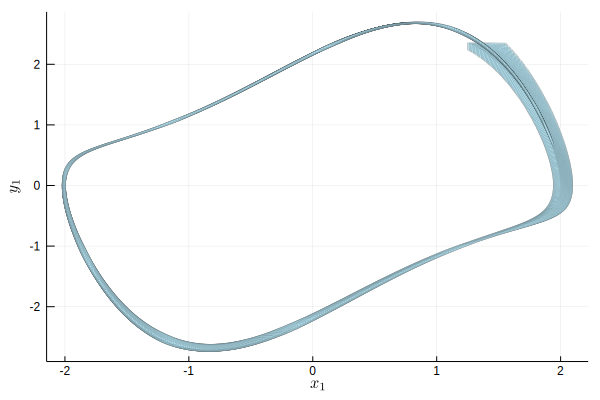

In [9]:
plot(πsol, xlab=L"x_1", ylab=L"y_1", lw=0.2, color=:lightblue, lab="")

To obtain the flowpipe corresponding to the second Van der Pol oscillator, we use another projection matrix.

In [10]:
M34 = sparse([1, 2], [3, 4], [1.0, 1.0], 2, 4)
Matrix(M34)

2×4 Array{Float64,2}:
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0

In [11]:
πsol = Vector{Zonotope{Float64}}()
for s in sol.Xk
    πs = linear_map(M34, set(s))
    push!(πsol, πs)
end
typeof(πsol), length(πsol)

(Array{Zonotope{Float64},1}, 808)

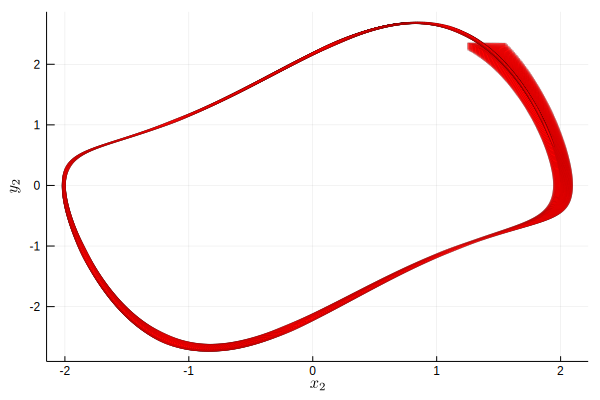

In [12]:
plot(πsol, xlab=L"x_2", ylab=L"y_2", lw=0.2, color=:red, lab="")